In [15]:
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
import math

In [4]:
signal, sr = librosa.load("/home/jyothish/Projects/Audio-Denoising-with-Autoencoders/test.wav")

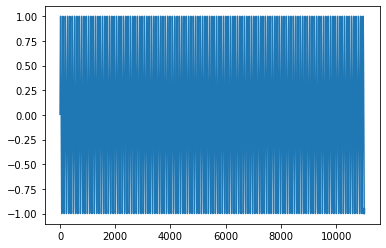

In [12]:
plt.plot(signal)

In [16]:
RMS=math.sqrt(np.mean(signal**2))

In [18]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [32]:
noise = get_white_noise(signal,.5)

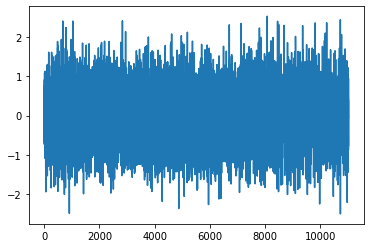

In [33]:
plt.plot(noise)

In [34]:
signal_noise = signal + noise

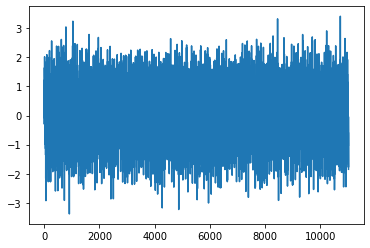

In [35]:
plt.plot(signal_noise)

In [61]:
sd.play(signal_noise, fs)